In [12]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import networkx as nx


df_2023 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2023-08.parquet")
df_2022 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2022-08.parquet")
df_2021 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2021-08.parquet")
df_2020 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2020-08.parquet")
df_2019 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2019-08.parquet")
df_2018 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2018-08.parquet")
df_2017 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2017-08.parquet")
df_2016 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2016-08.parquet")
df_2015 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2015-08.parquet")
df_2014 = pd.read_parquet("/Users/jesperberglund/Downloads/yellow_tripdata_2014-08.parquet")

#df_total = pd.concat([df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014], axis=1)
dataframes = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014]
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

for df, year in zip(dataframes, years):
    df.columns = [f'{col}{year}' for col in df.columns]

df_total = pd.concat(dataframes, axis=1)
print(df_total.columns)
# print(df_total['tip_amount'])
# h = [x for x in df_total['tip_amount'] if x == 0]
# print(len(h))
# pd.DataFrame.to_csv(df_total['tip_amount'][0:1000], 'df_tip.csv')
# df_total[['tip_amount', 'tpep_pickup_datetime']][0:1000].to_csv('df_tip.csv')
# pd.DataFrame.to_csv(df_total['tip_amount'][0:1000].mean(), 'df_tip_mean.csv')

columns_to_export = [f'{col}{year}' for year in years for col in ['tip_amount', 'tpep_pickup_datetime']]
df_total[columns_to_export][0:10].to_csv('df_tip.csv')


Index(['VendorID2023', 'tpep_pickup_datetime2023', 'tpep_dropoff_datetime2023',
       'passenger_count2023', 'trip_distance2023', 'RatecodeID2023',
       'store_and_fwd_flag2023', 'PULocationID2023', 'DOLocationID2023',
       'payment_type2023',
       ...
       'payment_type2014', 'fare_amount2014', 'extra2014', 'mta_tax2014',
       'tip_amount2014', 'tolls_amount2014', 'improvement_surcharge2014',
       'total_amount2014', 'congestion_surcharge2014', 'airport_fee2014'],
      dtype='object', length=190)


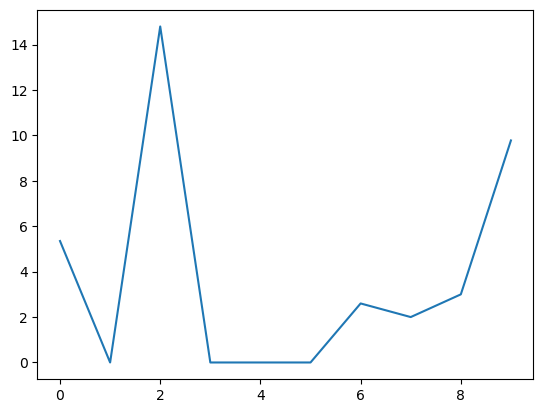

In [11]:
import matplotlib.pyplot as plt
plt.plot(df_total['tip_amount2023'][0:10])
